In [2]:
import pandas as pd


In [27]:
crashes = pd.read_csv('Traffic_Crashes_-_Crashes.csv', index_col='CRASH_DATE', parse_dates=True)
crashes

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
CRASH_DATE,,,,,,,,,,,,,,,,,,,,,
2022-07-15 00:45:00,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
2022-07-15 18:50:00,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
2022-07-15 17:10:00,01aaa759c6bbefd0f584226fbd88bdc549de3ed1e46255...,JF319819,NaN,40,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,17,6,7,41.975826,-87.650420,POINT (-87.650419778017 41.975826016449)
2022-07-15 08:44:00,0362b3f8ddb8589dfe889356efbc2ad213efe2031556f0...,JF318271,NaN,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,3.0,0.0,8,6,7,41.944199,-87.747157,POINT (-87.747157281564 41.944198992304)
2022-07-15 16:10:00,03d3679ef44bb8aa0f2060cb0376f3eeb1d9dbb2197322...,JF318956,NaN,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,PEDESTRIAN,FOUR WAY,...,1.0,0.0,1.0,0.0,16,6,7,41.855974,-87.663860,POINT (-87.663860117648 41.855973928536)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-29 17:58:00,eeb35261fea364c1a40c758acf1d340f3a5b723f6b74cd...,JF336541,NaN,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDESTRIAN,FOUR WAY,...,1.0,0.0,1.0,0.0,17,6,7,41.981758,-87.669891,POINT (-87.669891163529 41.981757992658)
2022-07-17 05:30:00,f9d60f924bf548ed0f776e54a711cfa13727d9842ff7b3...,JF320417,NaN,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,5,1,7,41.721365,-87.643358,POINT (-87.643358042341 41.721365060783)
2022-07-29 16:15:00,ea946e82248e1791fea1ccaeaaa2fb244acfc7700fbdcf...,JF336477,NaN,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,2.0,0.0,16,6,7,41.735671,-87.663670,POINT (-87.663669552099 41.735671226761)


In [14]:
mytable = crashes.loc[crashes.LIGHTING_CONDITION == 'DAYLIGHT' ].pivot_table('CRASH_RECORD_ID', index='FIRST_CRASH_TYPE', columns='INJURIES_FATAL')
mytable

C:\Users\Derrick\AppData\Local\Temp\ipykernel_3492\3647440777.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  mytable = crashes.loc[crashes.LIGHTING_CONDITION == 'DAYLIGHT' ].pivot_table('CRASH_RECORD_ID', index='FIRST_CRASH_TYPE', columns='INJURIES_FATAL')


INJURIES_FATAL
FIRST_CRASH_TYPE
ANGLE
ANIMAL
FIXED OBJECT
HEAD ON
OTHER NONCOLLISION
OTHER OBJECT
OVERTURNED
PARKED MOTOR VEHICLE
PEDALCYCLIST


In [7]:
injuryRateTable = crashes.pivot_table('CRASH_RECORD_ID', index='FIRST_CRASH_TYPE', columns='INJURIES', aggfunc='count')

array([ 0., nan,  1.,  2.,  3.,  4.])

In [5]:
# sort by dates
crashes.sort_index(inplace=True)

In [9]:
# filter out years 2013-2017
crashes = crashes.loc[crashes.index.year >= 2018]

## how have the weekly number of crashes changed over time?

## how has the injury rate changed over time

In [11]:
crashes.INJURIES_TOTAL.head(3)

CRASH_DATE
2018-01-01    0.0
2018-01-01    0.0
2018-01-01    0.0
Name: INJURIES_TOTAL, dtype: float64

In [19]:
crashes['INJURIES'] = (crashes.INJURIES_TOTAL >= 1).astype(int) # astype converts boolean to ints 0 and 1


In [16]:
crashes.INJURIES

CRASH_DATE
2018-01-01 00:00:00    0
2018-01-01 00:00:00    0
2018-01-01 00:00:00    0
2018-01-01 00:05:00    0
2018-01-01 00:07:00    0
                      ..
2022-09-11 00:53:00    0
2022-09-11 00:54:00    1
2022-09-11 01:25:00    0
2022-09-11 02:10:00    0
2022-09-11 03:23:00    0
Name: INJURIES, Length: 511500, dtype: int32

<AxesSubplot:xlabel='CRASH_DATE'>

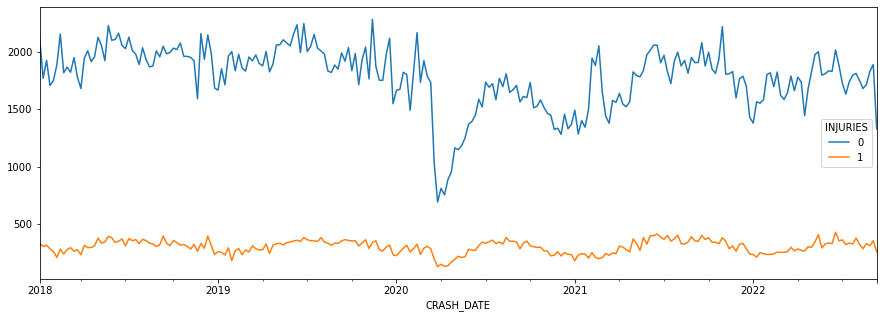

In [23]:
crashes.groupby('INJURIES').resample('W').CRASH_RECORD_ID.count().unstack(level=0).plot(figsize=(15,5))

In [25]:
# number of crashes that involve injuries
n_injuries = crashes.loc[crashes.INJURIES==1].resample('W').CRASH_RECORD_ID.count()
n_injuries.head()

CRASH_DATE
2018-01-07    331
2018-01-14    304
2018-01-21    316
2018-01-28    285
2018-02-04    261
Freq: W-SUN, Name: CRASH_RECORD_ID, dtype: int64

In [26]:
# total
n_total = crashes.resample('W').CRASH_RECORD_ID.count()


<AxesSubplot:xlabel='CRASH_DATE'>

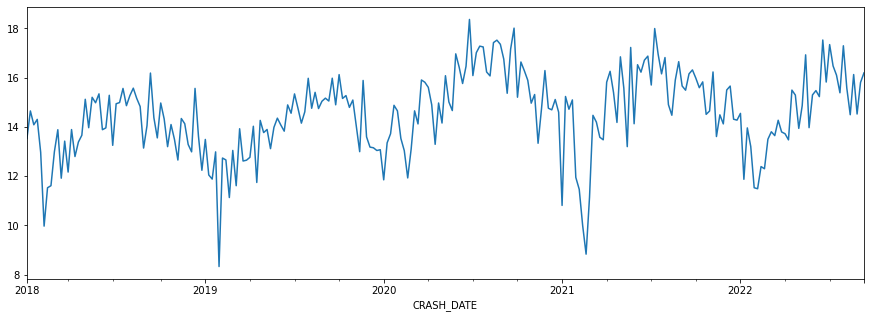

In [28]:
# percentage
((n_injuries/n_total) * 100).plot(figsize=(15,5))

## how does injury rate change through the week?

<AxesSubplot:xlabel='CRASH_DATE'>

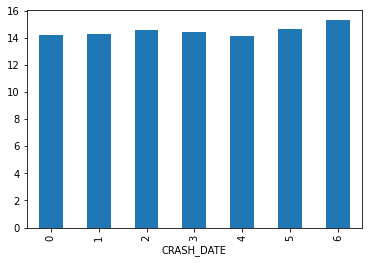

In [33]:
injuryRateTable = crashes.pivot_table('CRASH_RECORD_ID', index=crashes.index.dayofweek, columns='INJURIES', aggfunc='count')
injuryRateTable['Total'] = injuryRateTable.sum(axis=1) # sum alongd the columns
injuryRateTable['percentage'] = 100*(injuryRateTable[1]/injuryRateTable['Total'])
injuryRateTable.percentage.plot.bar()

## how do injuries vary with first crash type

<AxesSubplot:xlabel='FIRST_CRASH_TYPE'>

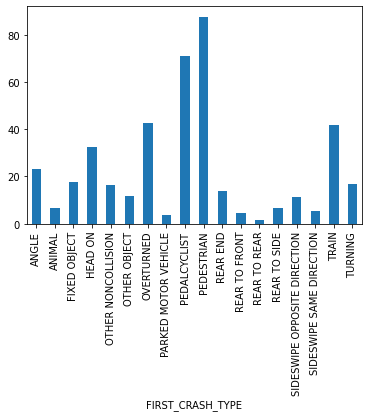

In [34]:
injuryRateTable = crashes.pivot_table('CRASH_RECORD_ID', index='FIRST_CRASH_TYPE', columns='INJURIES', aggfunc='count')
injuryRateTable['Total'] = injuryRateTable.sum(axis=1) # sum alongd the columns
injuryRateTable['percentage'] = 100*(injuryRateTable[1]/injuryRateTable['Total'])
injuryRateTable.percentage.plot.bar()

## are injuries more likely in different locations?

In [39]:
crashes.LATITUDE.head(3)

CRASH_DATE
2018-01-01    41.681735
2018-01-01    41.800575
2018-01-01    41.955842
Name: LATITUDE, dtype: float64

In [40]:
crashes.LONGITUDE.head(3)

CRASH_DATE
2018-01-01   -87.641014
2018-01-01   -87.589225
2018-01-01   -87.650268
Name: LONGITUDE, dtype: float64

In [16]:
crashes.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONG

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

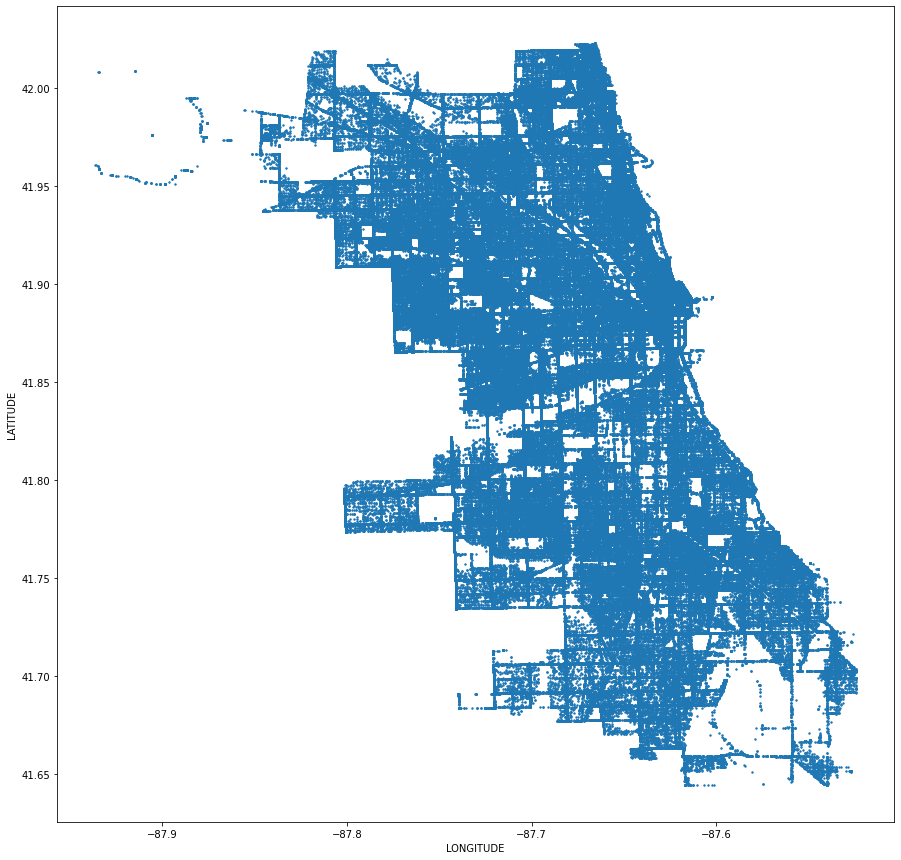

In [26]:
crashes.loc[(crashes.LATITUDE != 0) & (crashes.LONGITUDE != 0) & (crashes.INJURIES_FATAL>=0)].plot.scatter(x='LONGITUDE', y='LATITUDE',s=2, figsize=(15,15))

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

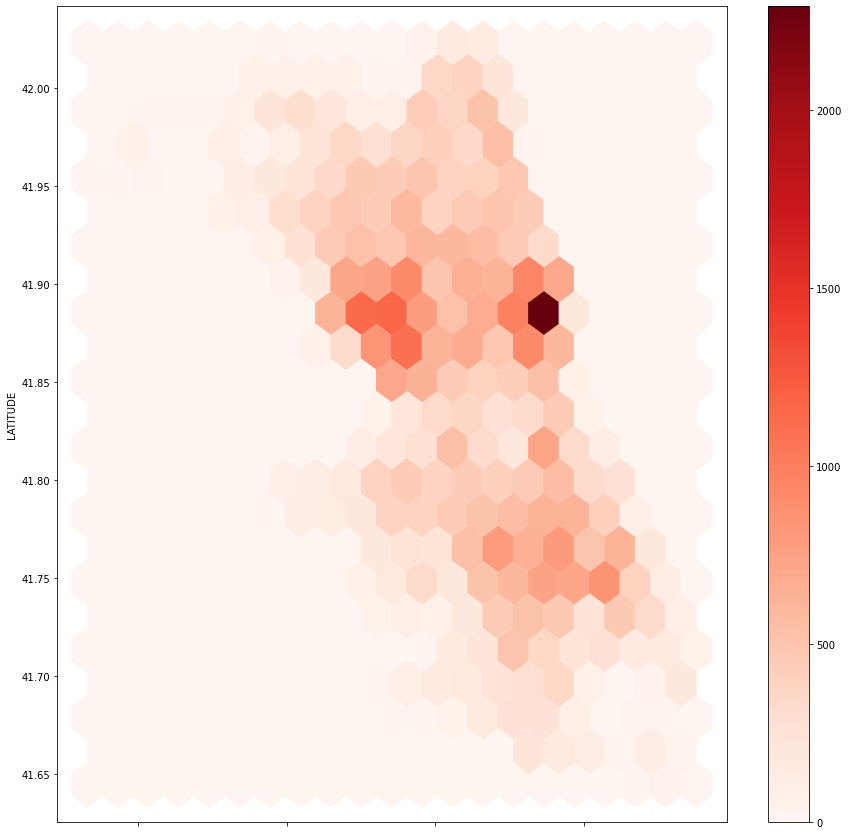

In [51]:
crashes.loc[(crashes.LATITUDE != 0) & (crashes.LONGITUDE != 0) & (crashes.INJURIES>=1)].plot.hexbin(x='LONGITUDE', y='LATITUDE', gridsize=20, cmap='Reds', figsize=(15,15))

## Area Plot

<AxesSubplot:xlabel='CRASH_DATE'>

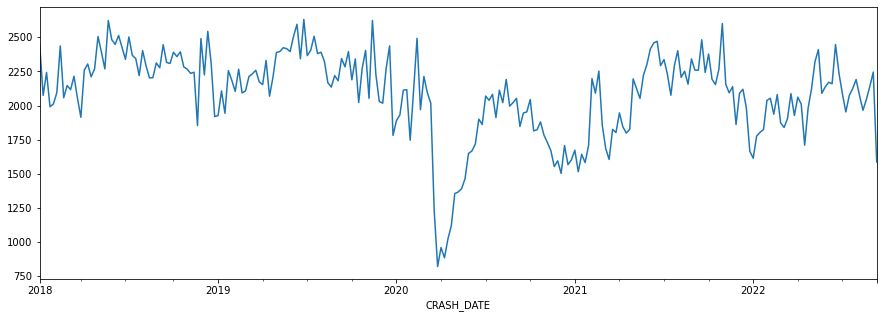

In [53]:
# weekly number of crashes
crashes.resample('W').CRASH_RECORD_ID.count().plot(figsize=(15,5))

<AxesSubplot:xlabel='CRASH_DATE'>

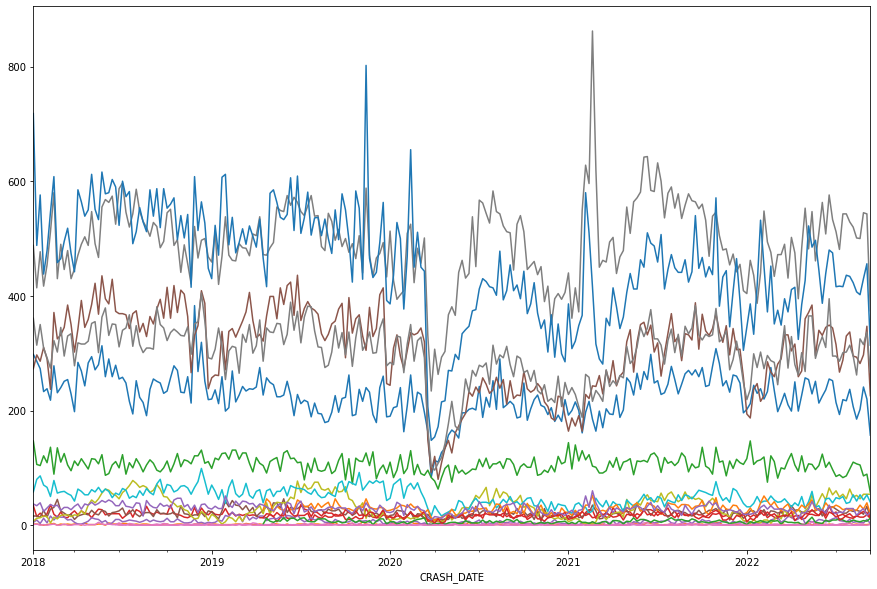

In [59]:
# weekly number of crash types
crashes.groupby('FIRST_CRASH_TYPE').resample('W').CRASH_RECORD_ID.count().unstack(level=0).plot(figsize=(15,10), legend=False)

<AxesSubplot:xlabel='CRASH_DATE'>

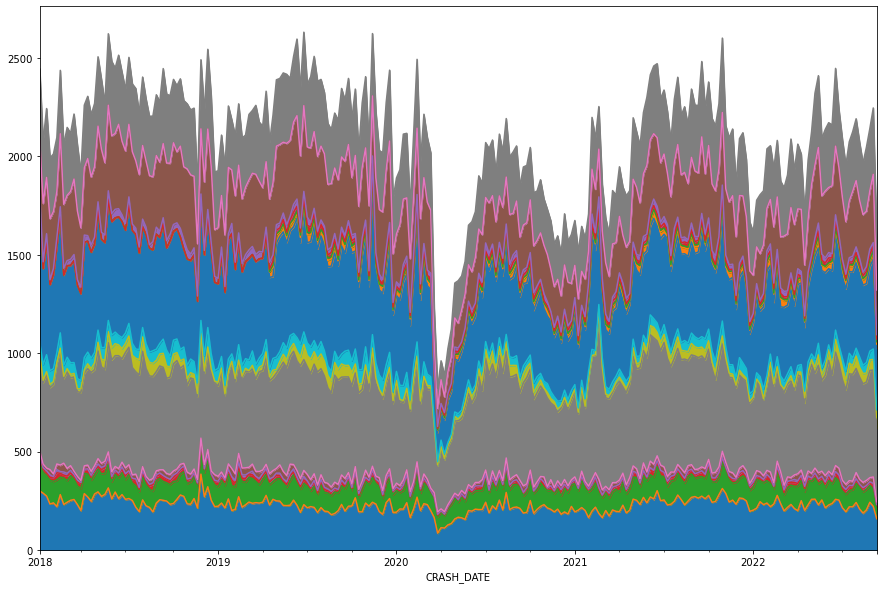

In [60]:
# weekly number of crash type graphed by area
crashes.groupby('FIRST_CRASH_TYPE').resample('W').CRASH_RECORD_ID.count().unstack(level=0).plot.area(figsize=(15,10), legend=False)

## Advanced Plotting

In [61]:
# pandas uses matplotlib
import matplotlib.pyplot as plt


In [64]:
# weekly number of crashes by injury status (0=no, 1=yes)
weekly = crashes.groupby('INJURIES').resample('W').CRASH_RECORD_ID.count().unstack(level=0)
weekly.head()

INJURIES,0,1
CRASH_DATE,,
2018-01-07,2114,331
2018-01-14,1771,304
2018-01-21,1927,316
2018-01-28,1707,285
2018-02-04,1751,261


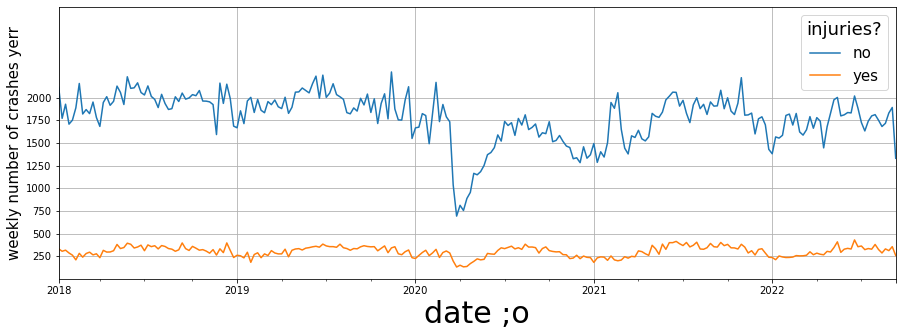

In [103]:
# create figure and axis
fig, axis = plt.subplots(figsize=(15,5))
# plot data
weekly.plot(ax=axis, legend=False)

# change x-axis label
axis.set_xlabel('date ;o', fontsize=30)
# change y-axis label
axis.set_ylabel('weekly number of crashes yerr', fontsize=15)
#grid lines
axis.grid(1)
# y ticks
axis.set_yticks([250,500,750,1000,1250,1500,1750,2000])
# set limits
axis.set_ylim([0,3000])
# modify legend
axis.legend(labels=['no','yes'], fontsize=15, loc='upper right', title='injuries?', title_fontsize=18) # to get loc parameters, enter an incorrect string 

Text(0, 0.5, 'weekly number of crashes')

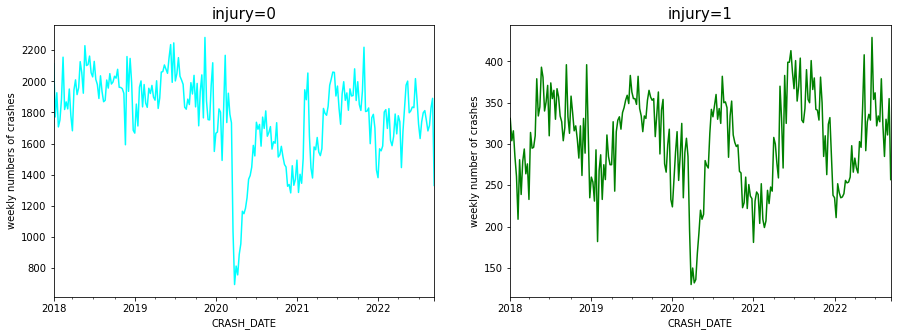

In [112]:
fix, axis = plt.subplots(1,2, figsize=(15,5))
weekly[0].plot(ax=axis[0], color='cyan')
axis[0].set_title('injury=0', fontsize=15)
axis[0].set_ylabel('weekly numbers of crashes')

weekly[1].plot(ax=axis[1], color='green')
axis[1].set_title('injury=1', fontsize=15)
axis[1].set_ylabel('weekly number of crashes')

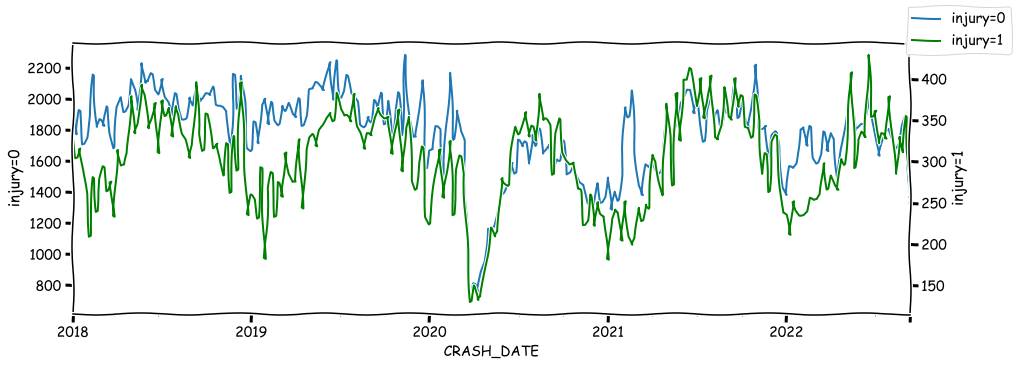

In [127]:
plt.xkcd() # makes lines wiggly, doesn't have gridlines
# say we want to plot data above in a single graph that uses 2 y axis
fig, axis = plt.subplots(figsize=(15,5))
# create a twin y axis sharing the x axis
axis2 = axis.twinx()
weekly[0].plot(ax=axis)
weekly[1].plot(ax=axis2, color='green')
axis.set_ylabel('injury=0', fontsize=15)
axis2.set_ylabel('injury=1', fontsize=15)
fig.legend(labels=['injury=0', 'injury=1'])
